# Autor: Daniel Oviedo

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('https://www.statlearning.com/s/Credit.csv')

df.head()

,Income,Limit,Rating,Cards,Age,Education,Own,Student,Married,Region,Balance
0,14.891,3606,283,2,34,11,No,No,Yes,South,333
1,106.025,6645,483,3,82,15,Yes,Yes,Yes,West,903
2,104.593,7075,514,4,71,11,No,No,No,West,580
3,148.924,9504,681,3,36,11,Yes,No,No,West,964
4,55.882,4897,357,2,68,16,No,No,Yes,South,331


In [ ]:
df.dtypes

,0
Income,float64
Limit,int64
Rating,int64
Cards,int64
Age,int64
Education,int64
Own,object
Student,object
Married,object
Region,object


# Realizar un **análisis descriptivo** para todas las características del dataset "credit.csv"


## 1. Identificar variables númericas, ordinales y nominales

In [ ]:
# Identificar columnas numéricas
numericas = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Identificar columnas nominales
nominales = df.select_dtypes(include=['object']).columns.tolist()

# Identificar columnas ordinales
ordinales = ['']

print("Columnas Numéricas:", numericas)
print("Columnas Nominales:", nominales)
print("Columnas Ordinales:", ordinales)

Columnas Numéricas: ['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education', 'Balance']
Columnas Nominales: ['Own', 'Student', 'Married', 'Region']
Columnas Ordinales: ['']


## 2. En cada caso presentar una visualización (Seleccione la más adecuada para los datos y presente los estadisticos que considere)

## 3. Mostrar una breve conclusion de lo encontrado

### Numéricas

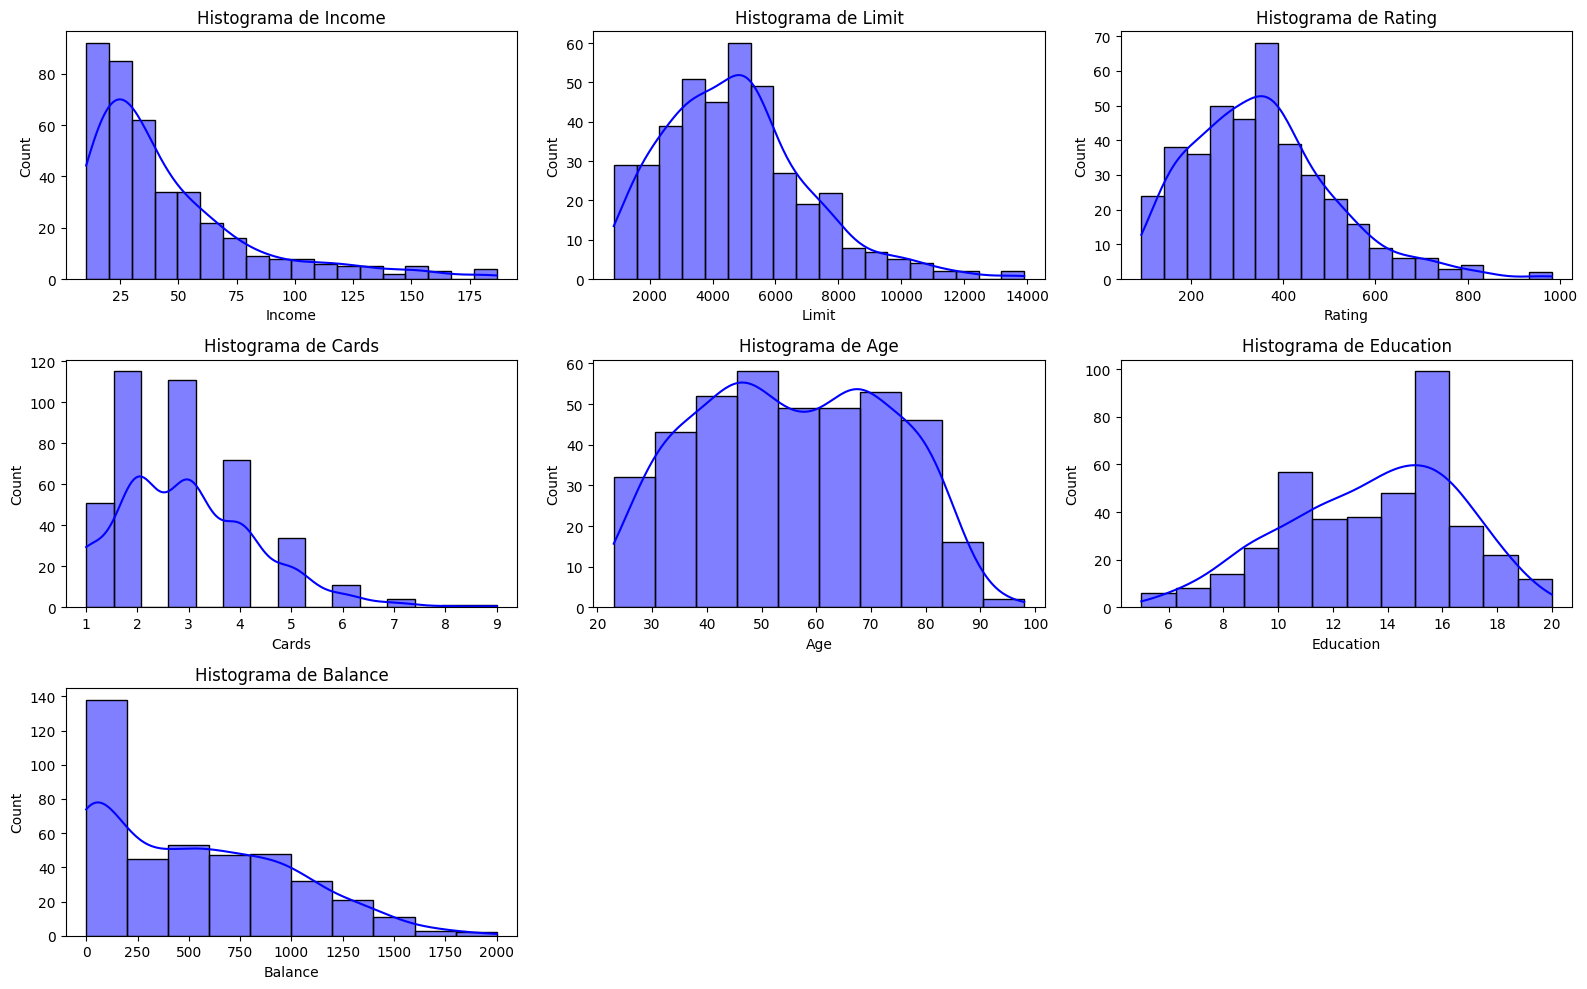

In [ ]:
# Variables numéricas
plt.figure(figsize=(16, 10))

for i, col in enumerate(numericas):
    plt.subplot(3, 3, i+1)
    sns.histplot(df[col], kde=True, color='blue')
    plt.title(f'Histograma de {col}')

plt.tight_layout()
plt.show()

* En cada uno de los histogramas correspondientes a las variables ["Income", "Limit", "Rating", "Cards", "Age", "Balance"] se encuentra una distribución a la derecha, lo que indica que la gran mayoria de valores se encuentra en la parte baja.

*Adicionalmente se encuentra que a medida de que aumentan las variables numericas, sus observaciones disminuyen.

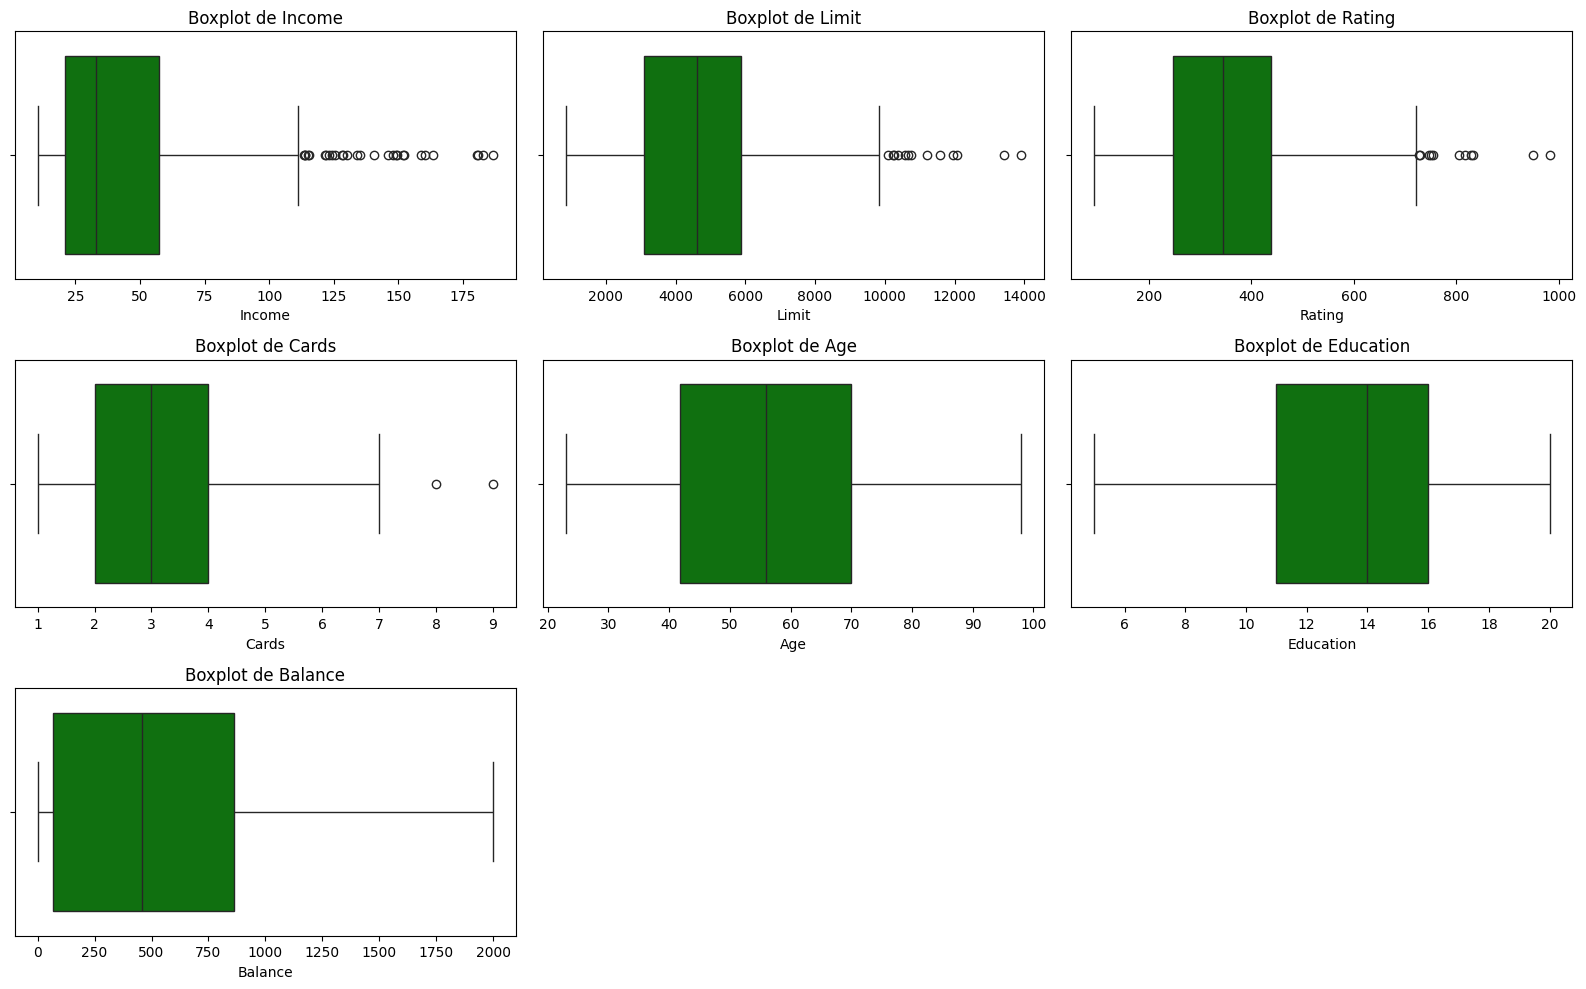

In [ ]:
plt.figure(figsize=(16, 10))

for i, col in enumerate(numericas):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x=df[col], color='green')
    plt.title(f'Boxplot de {col}')

plt.tight_layout()
plt.show()

<ipython-input-7-478274fb7bb1>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Region', y=df[col], data=df, palette='muted')
<ipython-input-7-478274fb7bb1>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Region', y=df[col], data=df, palette='muted')
<ipython-input-7-478274fb7bb1>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Region', y=df[col], data=df, palette='muted')
<ipython-input-7-478274fb7bb1>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `

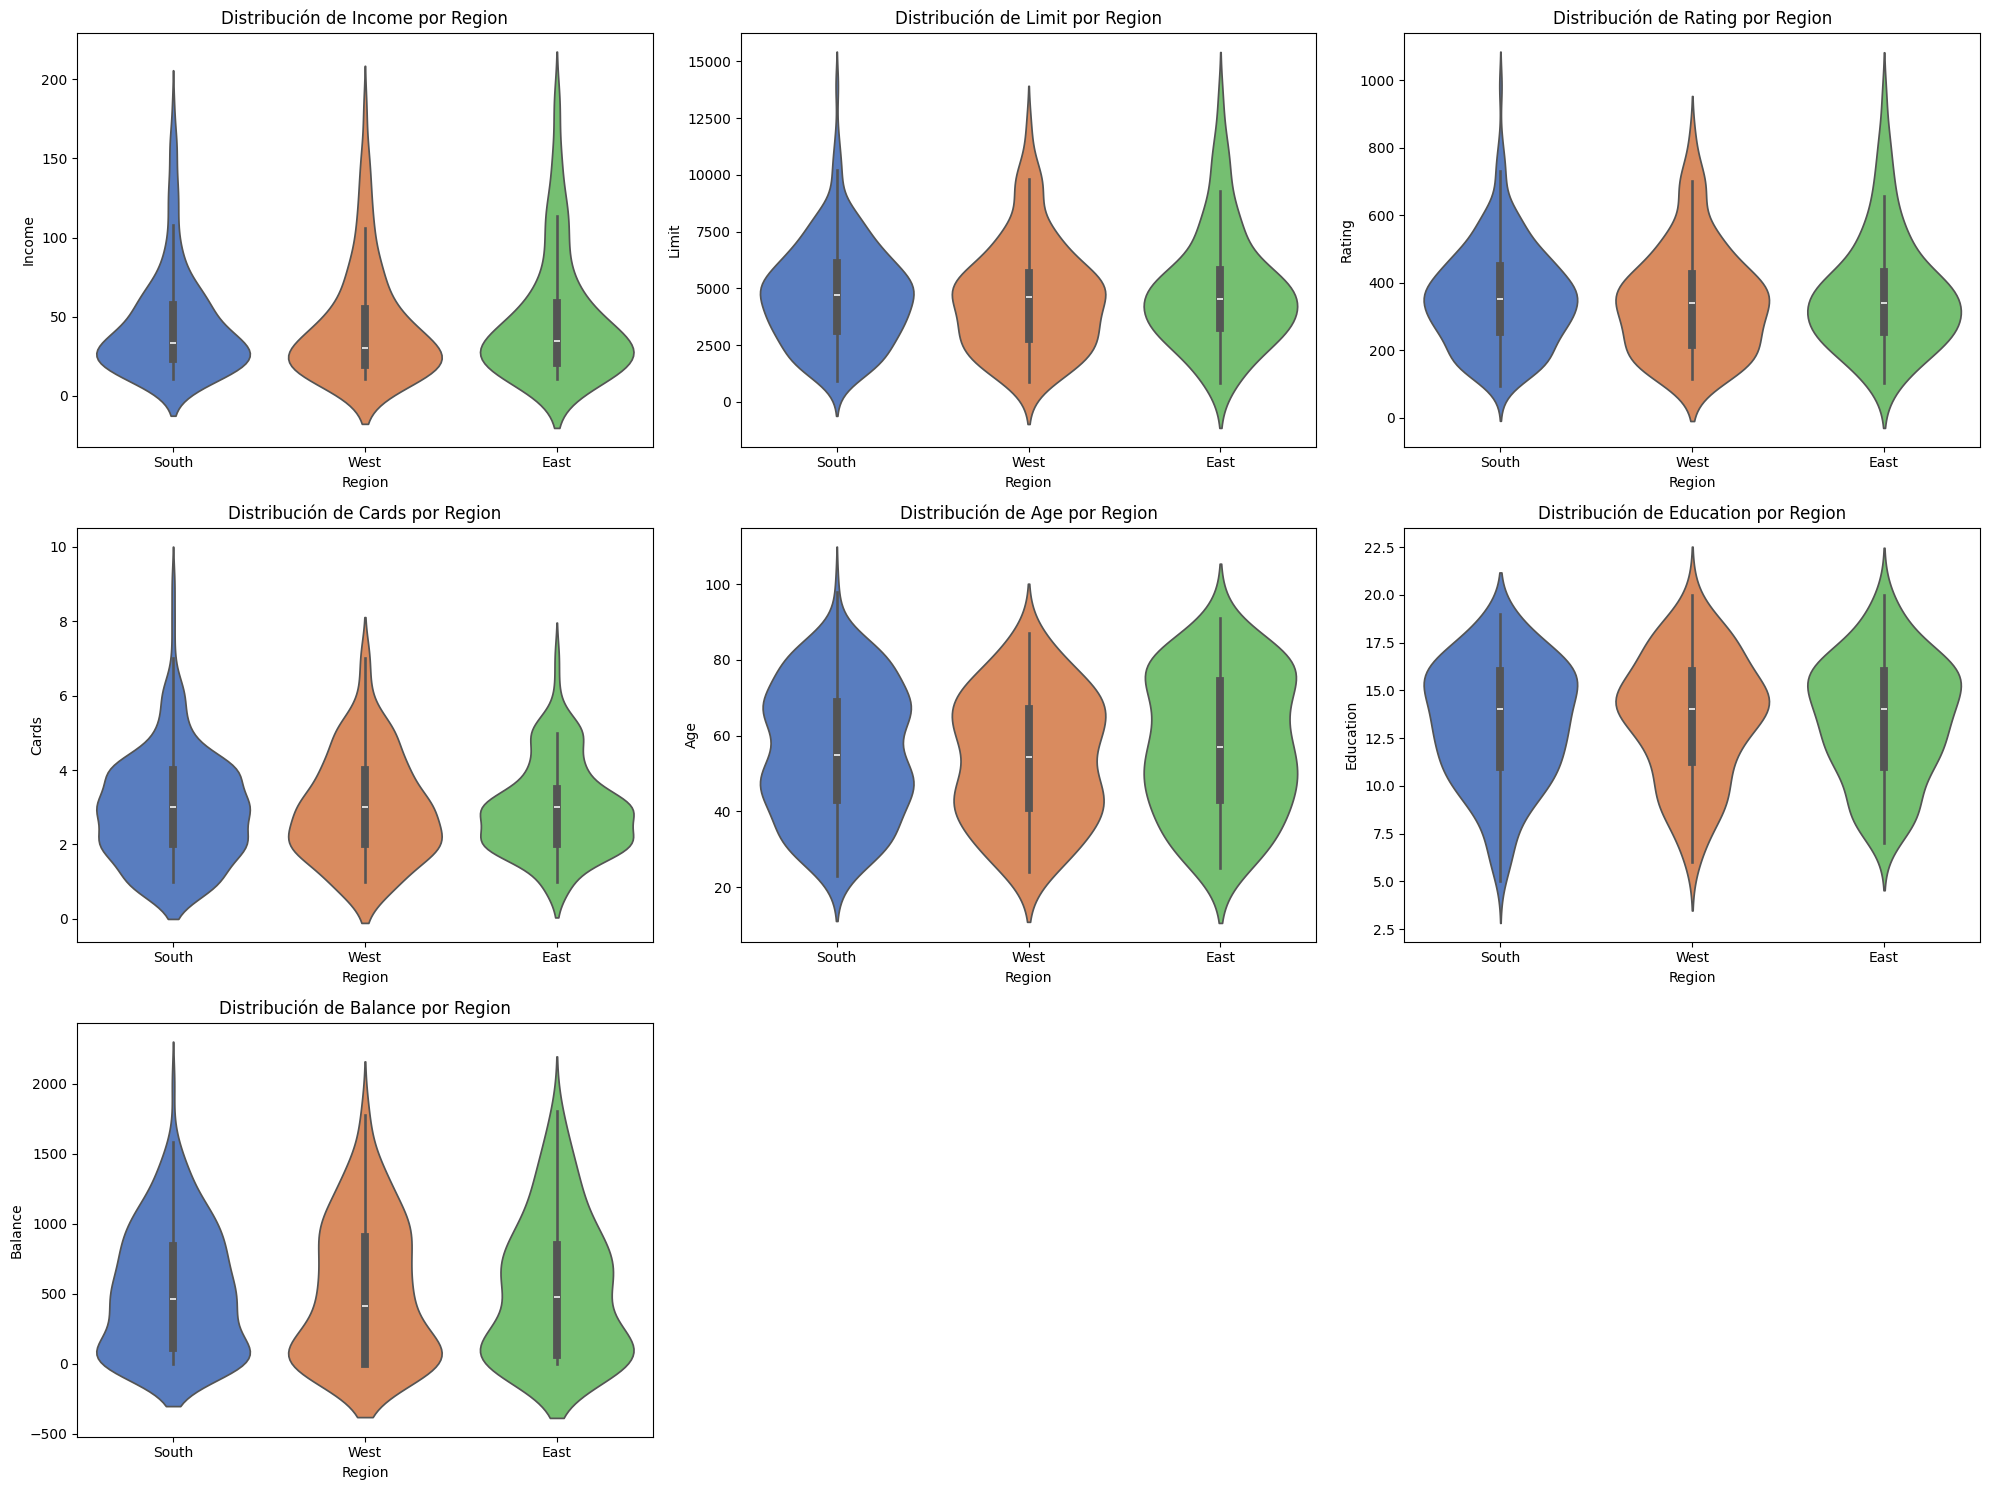

In [ ]:
plt.figure(figsize=(20, 15))

for i, col in enumerate(numericas):
    plt.subplot(3, 3, i+1)
    sns.violinplot(x='Region', y=df[col], data=df, palette='muted')
    plt.title(f'Distribución de {col} por Region')

plt.tight_layout()
plt.show()


In [ ]:
correlacion = df.corr( numeric_only= True )
correlacion

,Income,Limit,Rating,Cards,Age,Education,Balance
Income,1.000000,0.792088,0.791378,-0.018273,0.175338,-0.027692,0.463656
Limit,0.792088,1.000000,0.996880,0.010231,0.100888,-0.023549,0.861697
Rating,0.791378,0.996880,1.000000,0.053239,0.103165,-0.030136,0.863625
Cards,-0.018273,0.010231,0.053239,1.000000,0.042948,-0.051084,0.086456
Age,0.175338,0.100888,0.103165,0.042948,1.000000,0.003619,0.001835
Education,-0.027692,-0.023549,-0.030136,-0.051084,0.003619,1.000000,-0.008062
Balance,0.463656,0.861697,0.863625,0.086456,0.001835,-0.008062,1.000000


In [ ]:
# Calcular el coeficiente de correlación de Pearson entre 'Limit' y 'Rating'
coeficiente_pearson = df[['Limit', 'Rating']].corr().iloc[0, 1]

print("Coeficiente de correlación de Pearson entre Limit y Rating:", coeficiente_pearson)


Coeficiente de correlación de Pearson entre Limit y Rating: 0.9968797370016825


Text(0.5, 1.0, 'Relación entre edad y estudios')

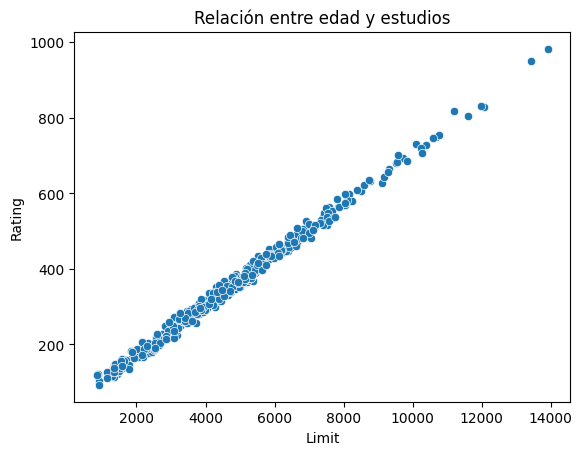

In [ ]:
sns.scatterplot(x='Limit', y='Rating', data=df)
plt.title('Relación entre edad y estudios')

* Se puede dimensionar en el diagrama de dispersión que a medida de que el rating de la persona sea mayor, su limit sera mayor.


### Nominales

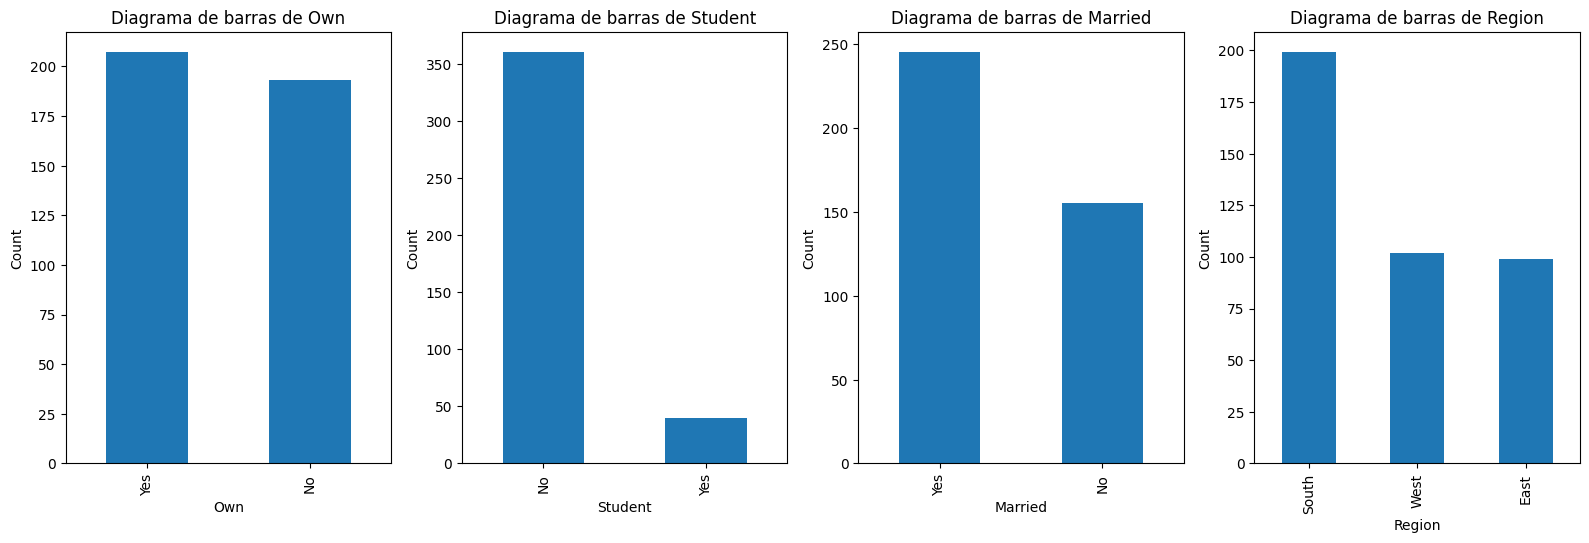

In [ ]:
# Variables nominales
plt.figure(figsize=(16, 10))

for i, col in enumerate(nominales):
    plt.subplot(2, 4, i+1)
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Diagrama de barras de {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Relación entre personas casadas por región')

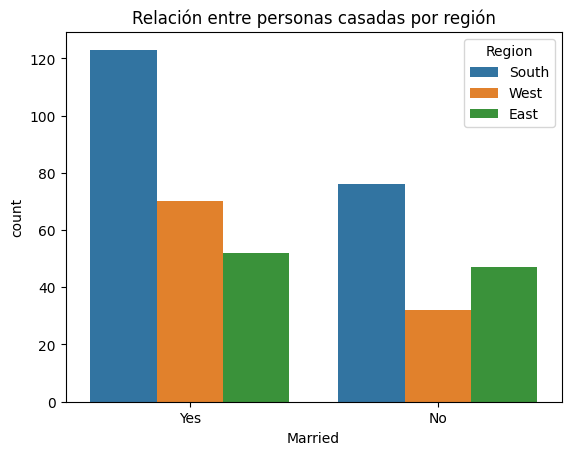

In [ ]:
sns.countplot(x='Married', hue='Region', data=df)
plt.title('Relación entre personas casadas por región')

In [ ]:
casadoRegion = pd.crosstab(df['Region'], df['Married'], margins=True)
casadoRegion

Married,No,Yes,All
Region,,,
East,47,52,99
South,76,123,199
West,32,70,102
All,155,245,400


In [ ]:
casadoRegion['married_region'] = casadoRegion['Yes'] / (casadoRegion['Yes'] + casadoRegion['No'])
casadoRegion

Married,No,Yes,All,married_region
Region,,,,
East,47,52,99,0.525253
South,76,123,199,0.618090
West,32,70,102,0.686275
All,155,245,400,0.612500


# Realizar un **análisis exploratorio**. Este análisis debe **SIEMPRE** partir de una pregunta





## 1. Estas preguntas (10 preguntas) deben considerar casos numérica-numérica, numérica-categórica, categórica-categórica.

## 2. En cada caso presentar una visualización (Seleccione la más adecuada para los datos y presente los estadísticos que considere)

## 3. Mostrar una breve conclusión de lo encontrado

### ¿Existe una relación entre el estado civil y el número de tarjetas de crédito que posee una persona? (categórico-numérico)

In [ ]:
meanMarriedCards = df.groupby('Married')['Cards'].mean()
meanMarriedCards

,Cards
Married,
No,2.974194
Yes,2.946939


In [ ]:
statisticsMarriedCards = df.groupby('Married')['Cards'].describe()
statisticsMarriedCards

,count,mean,std,min,25%,50%,75%,max
Married,,,,,,,,
No,155.0,2.974194,1.289057,1.0,2.0,3.0,4.0,8.0
Yes,245.0,2.946939,1.423328,1.0,2.0,3.0,4.0,9.0


<ipython-input-17-c92fe58b419b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Married', y='Cards', data=df, palette='pastel')


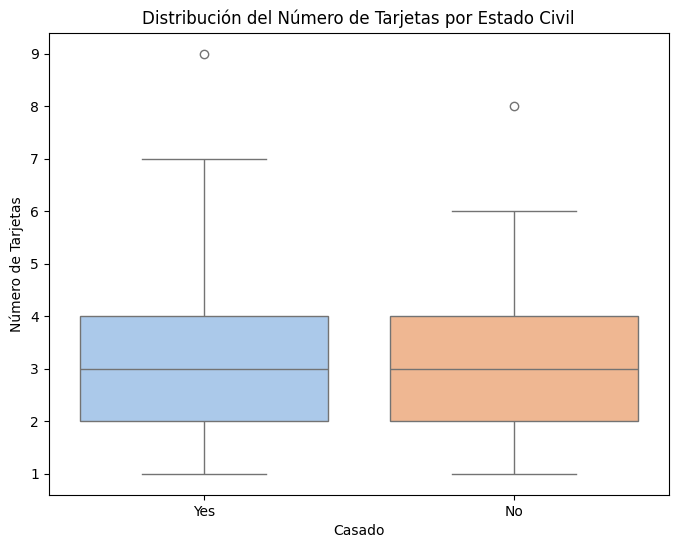

In [ ]:
# Boxplot de número de tarjetas por estado civil
plt.figure(figsize=(8, 6))
sns.boxplot(x='Married', y='Cards', data=df, palette='pastel')
plt.title('Distribución del Número de Tarjetas por Estado Civil')
plt.xlabel('Casado')
plt.ylabel('Número de Tarjetas')
plt.show()

<ipython-input-18-0806cf38f92f>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='Married', y='Cards', kind='violin', data=df, palette="pastel")


Text(0.5, 1.0, 'Relación entre estado civil y numero de tarjetas')

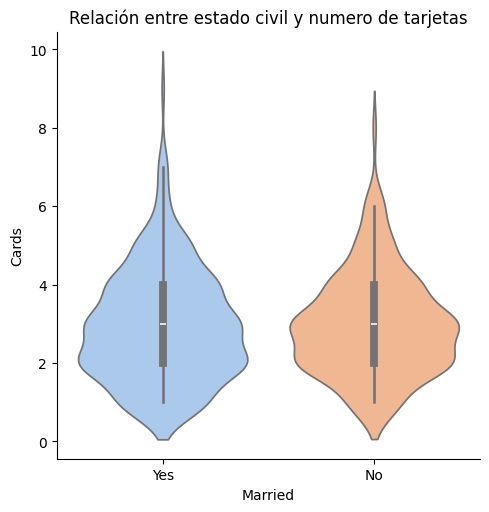

In [ ]:
sns.catplot(x='Married', y='Cards', kind='violin', data=df, palette="pastel")
plt.title('Relación entre estado civil y numero de tarjetas')

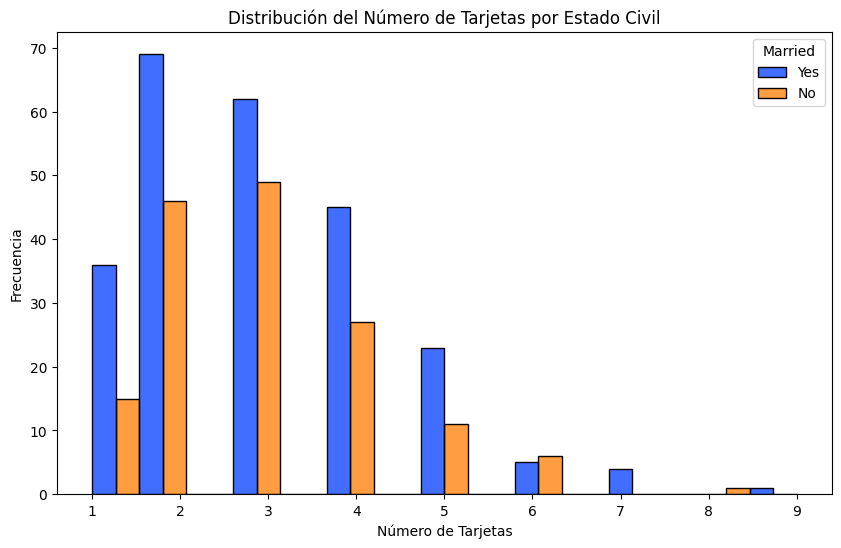

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Cards', hue='Married', palette='bright', multiple='dodge')
plt.title('Distribución del Número de Tarjetas por Estado Civil')
plt.xlabel('Número de Tarjetas')
plt.ylabel('Frecuencia')
plt.show()

* Se puede deducir hay cierta desviación estandar en cuanto a cantidad de tarjetas, puesto que hay un grupo muy reducido que cuenta con más de 8 tarjetas.

* Es más probable tener una alta cantidad de tarjetas estando casado que soltero, sin embargo, hay más gente que no esta casada y tiene un mayor número de tarjetas.

* Se encuentra una relación entre estar casado y tener cierta cantidad de tarjetas, sin embargo, la media de ambos nos muestra el mismo valor, lo que significa que tener cierta cantidad de tarjeta, no depende de si la persona esta casada o no.

### ¿Existe una relación significativa entre la edad de una persona y el límite de crédito que se le asigna? (numérico-numérico)

In [ ]:
correlation = df['Age'].corr(df['Limit'])
print(f"Correlación entre Edad y Límite de Crédito: {correlation}")

Correlación entre Edad y Límite de Crédito: 0.10088792156272054


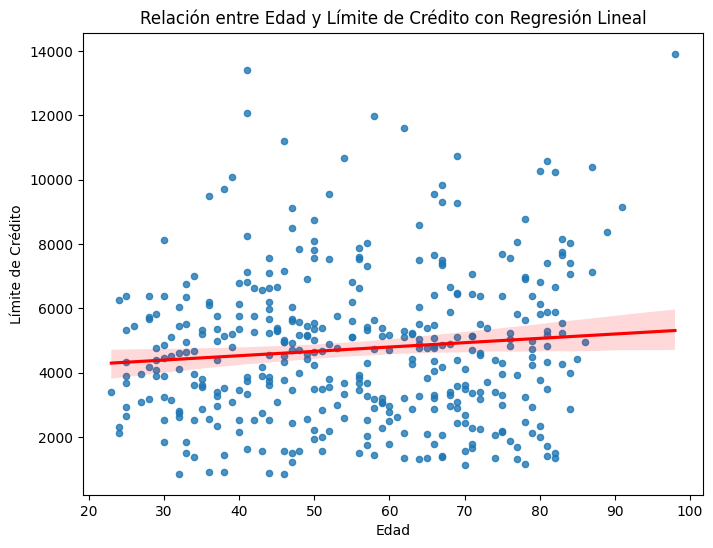

In [ ]:
plt.figure(figsize=(8, 6))
sns.regplot(x='Age', y='Limit', data=df, scatter_kws={'s':20}, line_kws={'color':'red'})
plt.title('Relación entre Edad y Límite de Crédito con Regresión Lineal')
plt.xlabel('Edad')
plt.ylabel('Límite de Crédito')
plt.show()

* La edad no influye directamente con el limite de credito puesto que, si bien la correlación indica que existe una ligera tendencia a que las personas de mayor edad tengan un mejor limite, la relación es muy baja y no termina siendo un factore determinante.

### ¿Existe una mayor probabilidad de que las personas casadas sean propietarias de una casa en comparación con las personas no casadas? (categórico-categórico)

In [ ]:
contingencia = pd.crosstab(df['Married'], df['Own'], margins=True)
contingencia

Own,No,Yes,All
Married,,,
No,76,79,155
Yes,117,128,245
All,193,207,400


In [ ]:
# Calcular proporciones
proporciones = pd.crosstab(df['Married'], df['Own'], normalize='index')
print(proporciones)

Own            No       Yes
Married                    
No       0.490323  0.509677
Yes      0.477551  0.522449


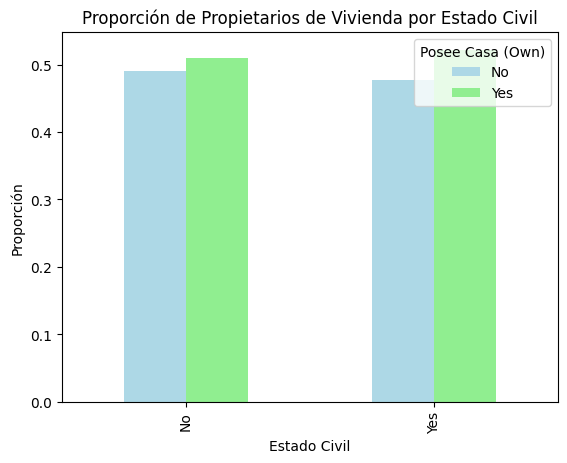

In [ ]:
proporciones.plot(kind='bar', color=['lightblue', 'lightgreen'])
plt.title('Proporción de Propietarios de Vivienda por Estado Civil')
plt.xlabel('Estado Civil')
plt.ylabel('Proporción')
plt.legend(title='Posee Casa (Own)')
plt.show()

* Se puede determinar que es más común encontrar que las personas casadas cuentan con una mayor proporcion de tener una casa propia en relacion de cualquier otra combinacion de variables.

* Asi mismo, tambien se visualiza la otra parte del grafico, las personas casadas, tambien cuentan con una mayor proporcion de no tener una casa propia en relacion con cualquier otra combinacion de variables.

* Es mas probable que una persona tenga vivienda propia si esta casado.

### ¿Cuál es la región con la mayor proporción de personas que poseen una vivienda propia? (categórico-categórico)

In [ ]:
contingencia_region = pd.crosstab(df['Region'], df['Own'], margins=True)
contingencia_region

Own,No,Yes,All
Region,,,
East,49,50,99
South,97,102,199
West,47,55,102
All,193,207,400


In [ ]:
proporciones_region = pd.crosstab(df['Region'], df['Own'], normalize='index')
proporciones_region

Own,No,Yes
Region,,
East,0.494949,0.505051
South,0.487437,0.512563
West,0.460784,0.539216


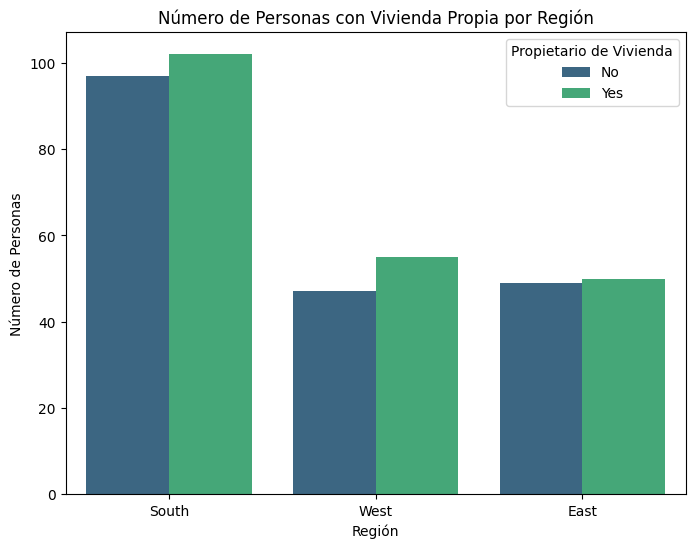

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Region', hue='Own', data=df, palette='viridis')
plt.title('Número de Personas con Vivienda Propia por Región')
plt.xlabel('Región')
plt.ylabel('Número de Personas')
plt.legend(title='Propietario de Vivienda')
plt.show()

* Se evidencia que las personas suelen vivir más en el sur, sin embargo, en proporción a los otros puntos, en el oeste se encuentra una mejor proporcion de tener casa propia, es decir, más de el 50% de la poblacion en el oeste cuentan con casa propia.

* En relación de cantidad de personas y cantidad de personas con vivienda, el oeste es el lugar donde en proporcion, hay más personas con vivienda propia, por ende, es el lugar donde menos personas no tienen vivienda propia.


### Son las personas con más años, las personas con más estudios? (numérico-numérico)

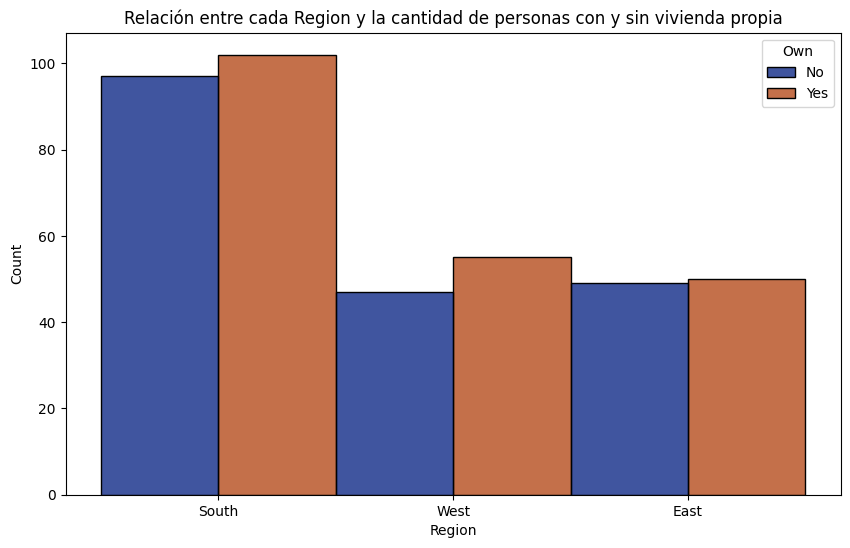

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Region', hue='Own', palette='dark', multiple='dodge')
plt.title('Relación entre cada Region y la cantidad de personas con y sin vivienda propia')
plt.show()

In [ ]:
correlacion = df['Age'].corr(df['Education'])
print(f"Correlación entre Edad y Años de Educación: {correlacion}")

Correlación entre Edad y Años de Educación: 0.0036192845743984394


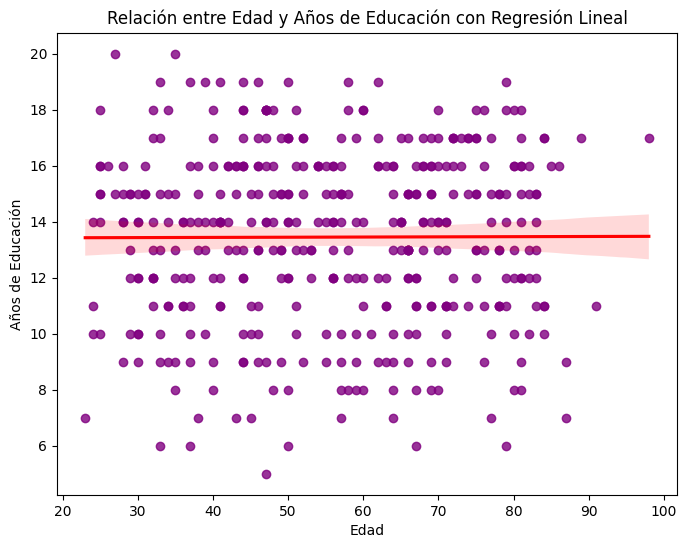

In [ ]:
plt.figure(figsize=(8, 6))
sns.regplot(x='Age', y='Education', data=df, color='purple', line_kws={"color":"red"})
plt.title('Relación entre Edad y Años de Educación con Regresión Lineal')
plt.xlabel('Edad')
plt.ylabel('Años de Educación')
plt.show()


* Se evidencia que ambas variables son casi que independientes en su totalidad una de la otra puesto que la correlación es una de las más bajas y adicionalmentem la regresión lineal se muestra totalmente recto, por lo que no hay una tendencia que demuestre que a medida de que la persona tenga más edad, signifia que tenga mas estudios.

### ¿Tener un mejor limite implica tener un mejor rating? (numérico-numérico)

In [ ]:
correlacion = df['Limit'].corr(df['Rating'])
print(f"Correlación entre Limit y Rating : {correlacion}")

Correlación entre Limit y Rating : 0.996879737001683


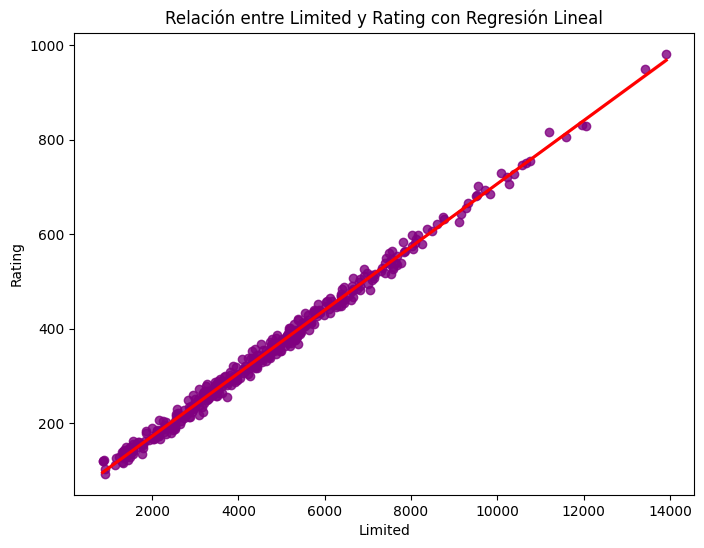

In [ ]:
plt.figure(figsize=(8, 6))
sns.regplot(x='Limit', y='Rating', data=df, color='purple', line_kws={"color":"red"})
plt.title('Relación entre Limited y Rating con Regresión Lineal')
plt.xlabel('Limited')
plt.ylabel('Rating')
plt.show()



*   Se puede observar que hay una clara relación entre las variables " Limited" y "Rating". A medida que aumenta el límite de crédito, tambien aumenta el Rating.
*   La regresión nos indica que la variable " Limited" es un buen predictor del posible "Rating" que puede tener una persona.








### ¿Cual es la región en donde las personas cuentan con mejor balance? (Categórico-numérico)

<ipython-input-33-8b0cf4374810>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Region', y='Balance', data=df, palette='Set2')


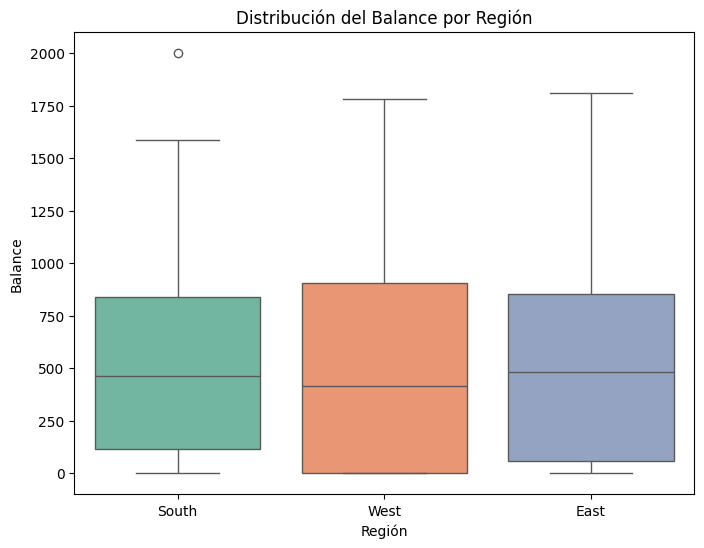

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Region', y='Balance', data=df, palette='Set2')
plt.title('Distribución del Balance por Región')
plt.xlabel('Región')
plt.ylabel('Balance')
plt.show()

In [ ]:
# Calcula la media, mediana y desviación estándar del balance por región
balance_stats = df.groupby('Region')['Balance'].agg(['mean', 'median', 'std'])
print(balance_stats)



              mean  median         std
Region                                
East    531.000000   480.0  485.632745
South   518.497487   465.0  436.946693
West    512.313725   414.0  481.402468




*   La región "East" es donde, en promedio, las personas cuentan con el mejor balance, ya que tiene la media más alta.
*   En la región de "South" tiene una mayor dispersión y un outlier, lo que nos indica que la mayoria de personas pueden tener balances más altos, aunque hay una amyor variabilidad en los datos



### ¿Implica la región para poder tener más años estudiando? (categórico-numérico)

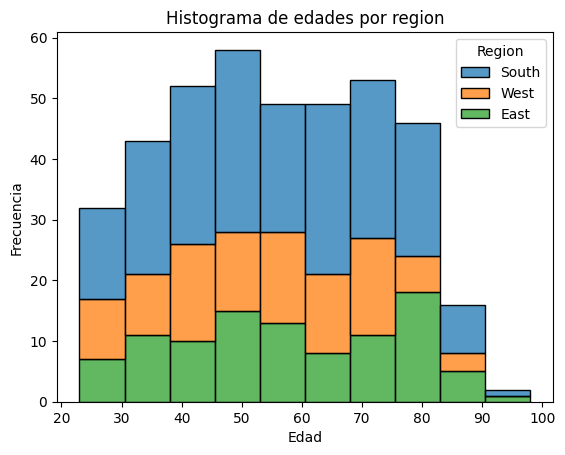

In [ ]:
# Histograma de sobrevivientes por edad
sns.histplot(data=df, x='Age', hue='Region', multiple='stack')
plt.title('Histograma de edades por region')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

<ipython-input-36-b9b477ab10d6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Region', y='Age', data=df, palette='Set2')


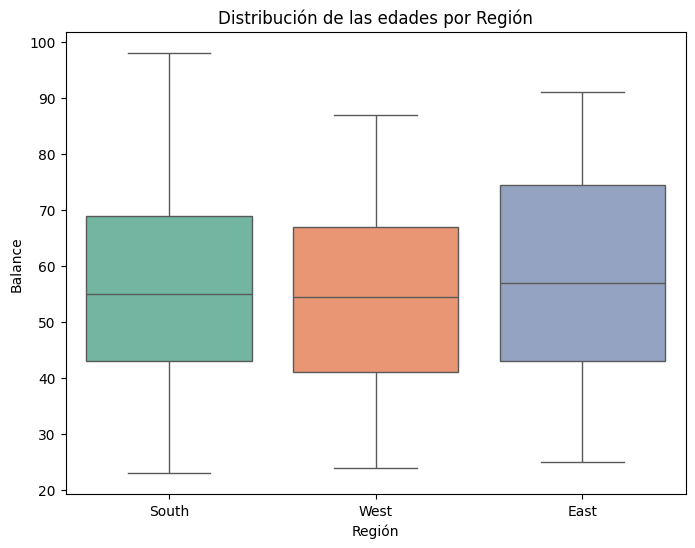

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Region', y='Age', data=df, palette='Set2')
plt.title('Distribución de las edades por Región')
plt.xlabel('Región')
plt.ylabel('Balance')
plt.show()

<ipython-input-37-3f7d7490059b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='Region', y='Age', kind='violin', data=df, palette='bright')


Text(0.5, 1.0, 'Relación entre la region y las edades')

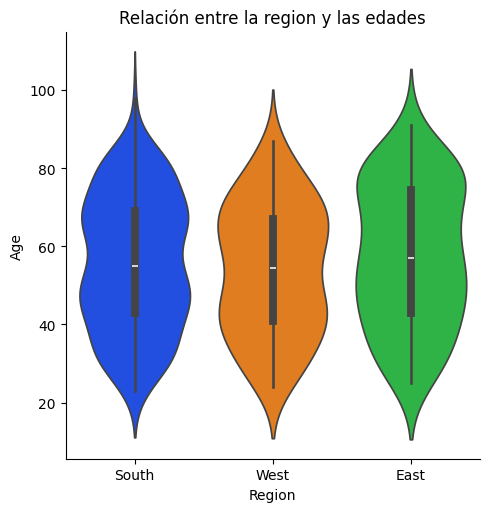

In [ ]:
# Diagrama de violin de la relacion entre cada sobreviviente y su edad
sns.catplot(x='Region', y='Age', kind='violin', data=df, palette='bright')
plt.title('Relación entre la region y las edades')

In [ ]:
df[['Age', 'Region']].groupby('Region').agg(['mean', 'std'])

Age           
             mean        std
Region                      
East    57.505051  18.072063
South   55.653266  17.170723
West    53.911765  16.558389

* Se puede ver que hay una media mayor entre la region del este, por ende, tambien se encuentra una mayor desviación estandar, pero esto se entiende por la cantidad de valores que hau.

* En el sur se encuentra una mayor dispersión en edades que en las otras dos regiones


### ¿Implica tener mejor limit por tener mas años de estudio? (numérico-numérico)

In [ ]:
correlacion = df['Limit'].corr(df['Education'])
print(f"Correlación entre Limit y Años de Educación: {correlacion}")

Correlación entre Limit y Años de Educación: -0.023548534180669666


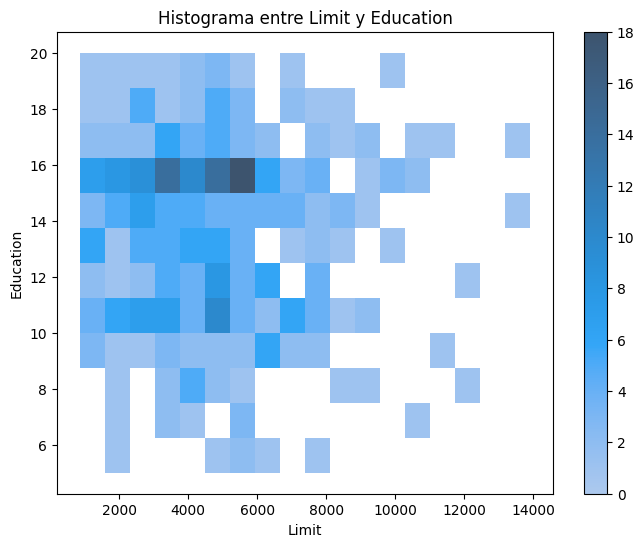

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Limit', y='Education', cbar=True)
plt.title('Histograma entre Limit y Education')
plt.xlabel('Limit')
plt.ylabel('Education')
plt.show()

- No, el valor de la correlacion indica que practicamente no hay correlacion entre estas 2 variables
- Al ser los datos tan densos de estas 2 variables decidimos escoger un histograma bidimencional para ver como era la distribucion conjunta e identificar una alta ocurrencia de datos, y como se puede observar la ocurrencia entre limit y education no amuenta de manera proporcional.

### ¿En que región se encuentran más estudiantes? (categórico-categórico)

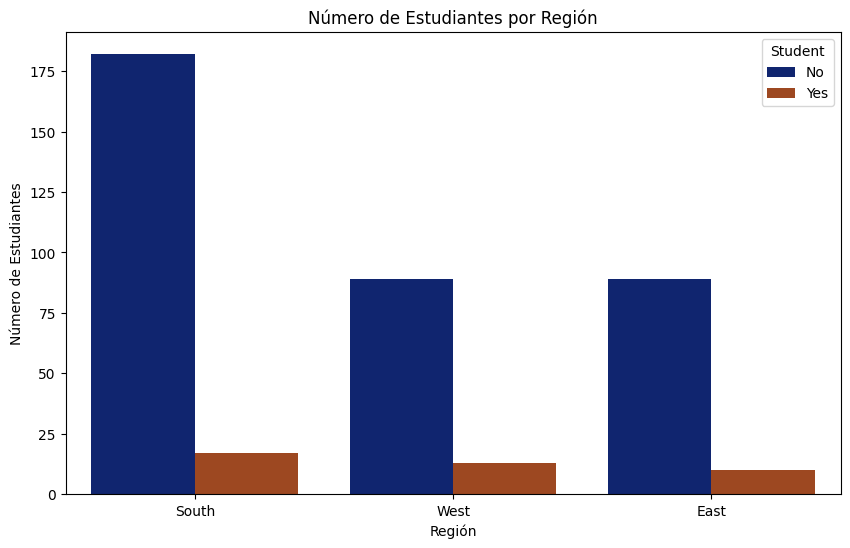

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Region',hue='Student', palette='dark')
plt.title('Número de Estudiantes por Región')
plt.xlabel('Región')
plt.ylabel('Número de Estudiantes')
plt.show()


In [ ]:
proporciones_estudiantes = pd.crosstab(df['Region'], df['Student'], normalize='index')
proporciones_estudiantes

Student,No,Yes
Region,,
East,0.898990,0.101010
South,0.914573,0.085427
West,0.872549,0.127451




*   Se observa que en las tres regiones, la mayoria de personas no son estudiantes.
*   La proporción de estudiantes en relación con los no  no es similar en las tres regiones. pero la región "West" tiene la mayor cantidad de estudiantes.


*  La región "South" es el lugar en donde se encuentro la mayor cantidad de
 no estudiantes y a su vez es la región con menor número de estudiantes.




